## GRIP @ The Spark Foundation

Data Science and Business Analytics Internship

Batch: August, 2024

## TASK 1 -> Prediction Using Supervised Machine Learning

-> To predict the percentage of the student based on the number of study hours

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pickle

Loading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_scores.csv to student_scores.csv


In [3]:
score_df = pd.read_csv('student_scores.csv')

In [4]:
score_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Dataset description

Input variable: Hours

Output variables: scores

Data Exploratory

In [6]:
score_df.shape

(25, 2)

In [7]:
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
score_df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

In [10]:
score_df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

Checking for Missing Values

In [13]:
score_df.isnull()
score_df.isnull().sum

<bound method DataFrame.sum of     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False>

In [14]:
score_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Data Visualization

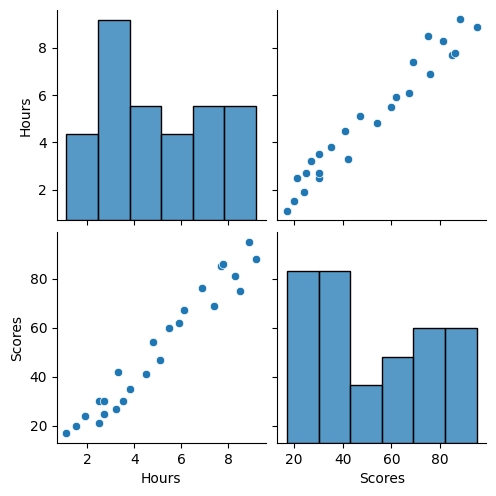

In [15]:
sns.pairplot(score_df)

Boxplot for Checking Outliers

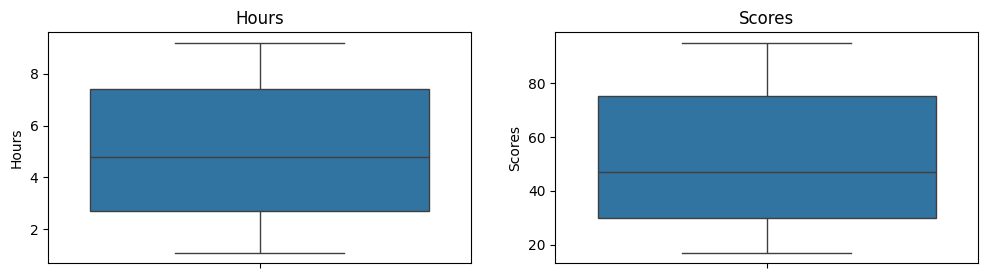

In [16]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(score_df['Hours'])
plt.title('Hours')

plt.subplot(1,2,2)
sns.boxplot(score_df['Scores'])
plt.title('Scores')
plt.show()

Normality Assumption Check

<ipython-input-17-056f6ebfc3a9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_df.Hours)
<ipython-input-17-056f6ebfc3a9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_df.Scores)


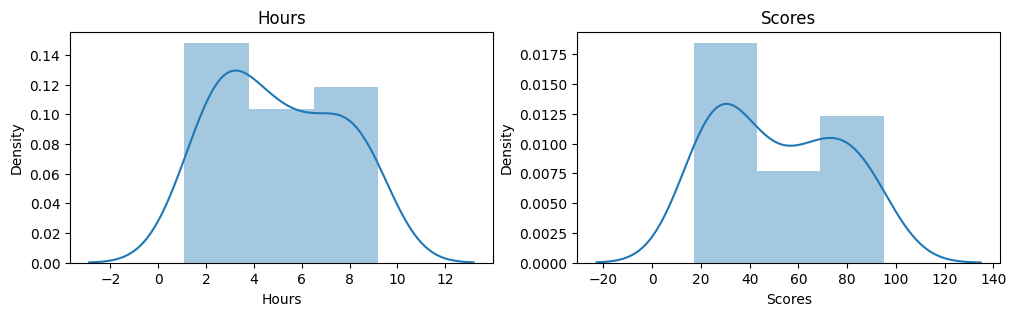

In [17]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(score_df.Hours)
plt.title('Hours')

plt.subplot(1,2,2)
sns.distplot(score_df.Scores)
plt.title('Scores')
plt.show()

Hence it shows a Normal Distribution

Plotting Histogram for further Analysis

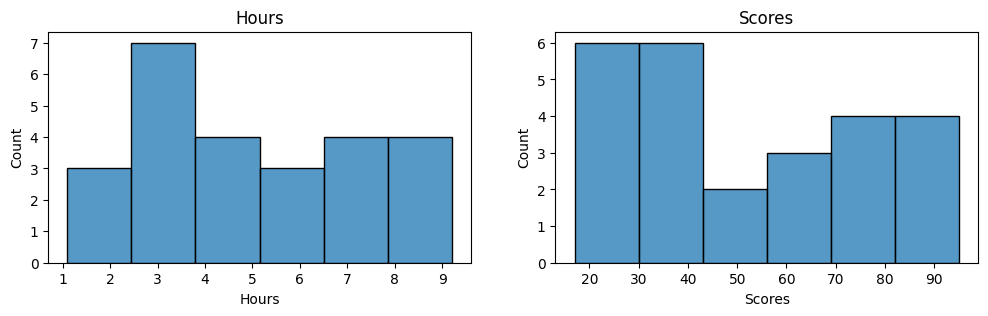

In [18]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.histplot(score_df['Hours'])
plt.title('Hours')

plt.subplot(1,2,2)
sns.histplot(score_df['Scores'])
plt.title('Scores')
plt.show()

Correlation Matrix

In [20]:
correlation = score_df.corr()

<Axes: >

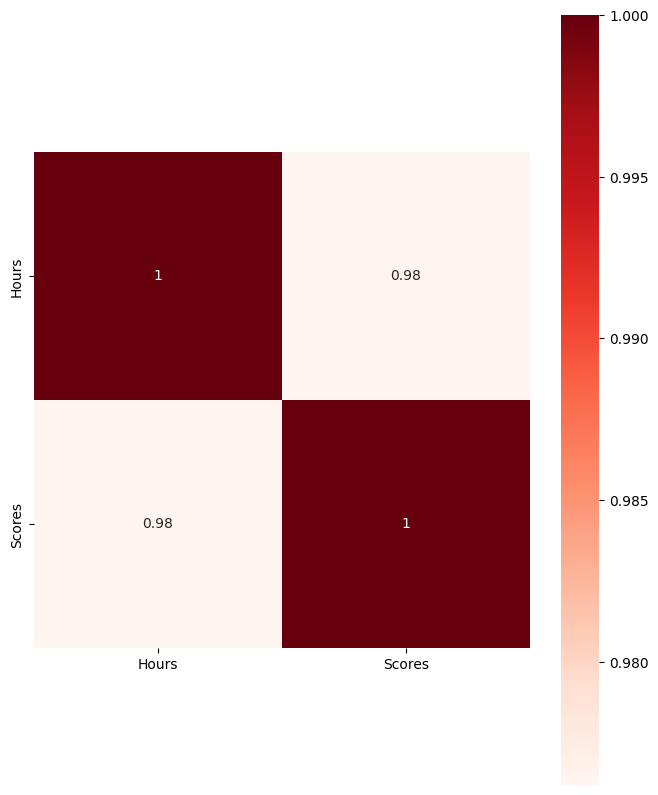

In [25]:
fig = plt.subplots(figsize = (8,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Reds')

Hence it shows that the variables are Highly Correlated, meaning the variables has strong relation with eachother.

Plotting distribution of Scores

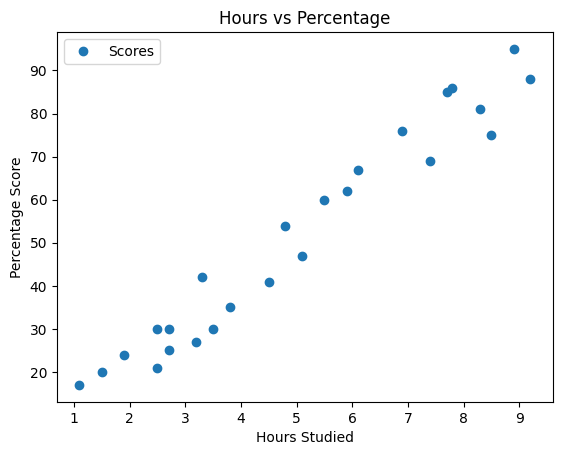

In [26]:
score_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

There is a positive linear relation between number of hours studied and percentage of scores

Data Pre-Processing

In [27]:
x = score_df.iloc[:, :-1].values
y = score_df.iloc[:, 1].values

Splitting the Data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

Using Linear Regression for Training the Algorithm

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training complete.')
print('regressor.coef_:',regressor.coef_)
print('regressor.intercept_:',regressor.intercept_)

Training complete.
regressor.coef_: [9.68207815]
regressor.intercept_: 2.826892353899737


Plotting the Regression Line

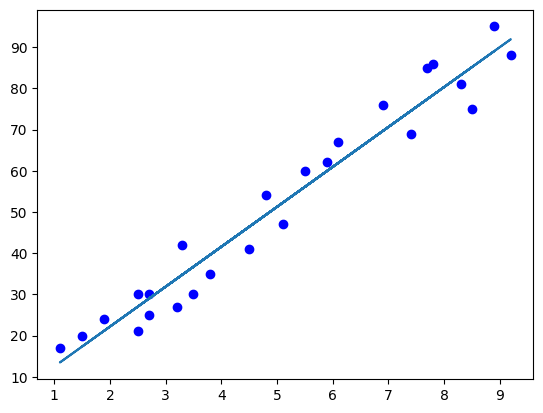

In [33]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y,color='blue')
plt.plot(x, line);
plt.show()

Training Score

In [34]:
training_score = round(regressor.score(x_train, y_train)*100,2)
training_score

94.91

Model Prediction

In [35]:
#testing data - in hours
print(x_test)
# predicting the scores
y_pred = regressor.predict(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


Accuracy of Model

In [36]:
test_score = round(regressor.score(x_test, y_test)*100,2)
test_score

96.78

R2 Score

In [37]:
r2_score(y_test,y_pred)

0.9678055545167994

Actual Vs Predicted analysis

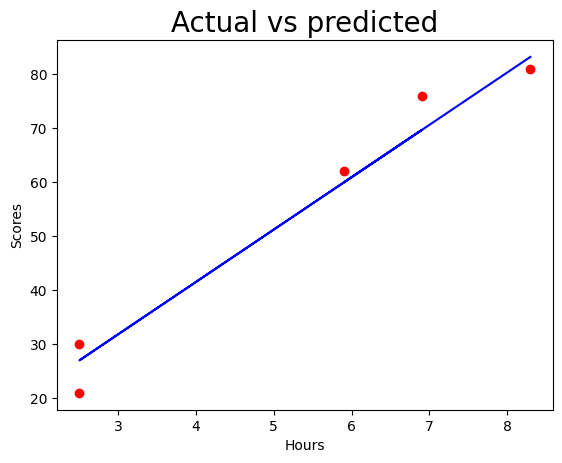

In [39]:
plt.scatter(x=x_test,y=y_test,color='Red')
plt.plot(x_test,y_pred,color='blue')
plt.title('Actual vs predicted', size= 20)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Evaluating the Model

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


Lower MAE implies the model's predicted values are close to the actual ones.

Comparing Actual Vs Predicted

In [43]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Variance':y_test-y_pred})
df1.head()

,Actual,Predicted,Variance
0,81,83.188141,-2.188141
1,30,27.032088,2.967912
2,21,27.032088,-6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


<Axes: >

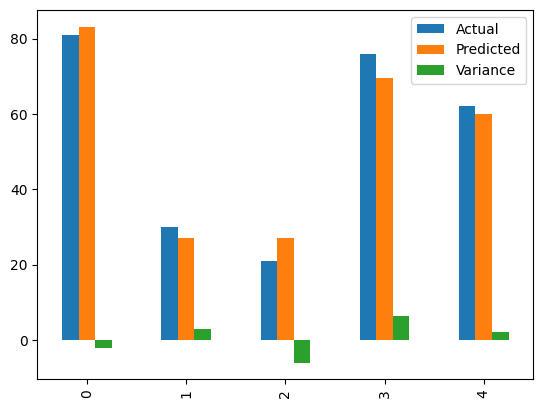

In [44]:
df1.plot(kind='bar')

What will be the predicted score if a student studied 9.25hrs/day?

In [45]:
hours = [[9.25]]
pred = regressor.predict(hours)
print('No of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


## _*So if a Student is studying for 9.25 Hours a Day, then the student is likely to Score 92.38%*_